In [62]:
# Import some libraries
import numpy as npy
import pandas as pds
import matplotlib.pyplot as plt

In [63]:
# Load the Preprocessed data
# df_preprocessed = pds.read_csv('../../dataset/global_CO2_emissions/global_CO2_emmissions_preprocessed.csv')
df_preprocessed = pds.read_csv('../../dataset/global_CO2_emissions/world_gdp_with_focus_on_industries_preprocessed.csv')
df_preprocessed.head()

,Year,"Agriculture, Fishing and Forestry",Consumable Product,Defence and Security,Direct Industrial product,Energy sources,"Engineering, Machinery and Equipment","Health, Finance and Education",Housing and Entertainment Services,Mining Product and Activities,Other industry and services,Technology and Communication Activities,Transport,Waste,GDP (Billion US Dollars)
0,1995-01-01,359.649389,376.594487,153.550946,1197.997726,6250.66963,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
1,1995-01-02,359.649389,376.594487,153.550946,1197.997726,6250.66963,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
2,1995-01-03,359.649389,376.594487,153.550946,1197.997726,6250.66963,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
3,1995-01-04,359.649389,376.594487,153.550946,1197.997726,6250.66963,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
4,1995-01-05,359.649389,376.594487,153.550946,1197.997726,6250.66963,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48


##### FEATURE SCALING

In [64]:
# Scale the numerical variables i.e, between 0 and 1
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_prep_scaled = scaler.fit_transform(df_preprocessed[df_preprocessed.columns[1:]])
# df_preprocessed[df_preprocessed.columns[1:]] = scaler.fit_transform(df_preprocessed[df_preprocessed.columns[1:]])
# df_prep_scaled = df_preprocessed.copy()
df_prep_scaled

# Convert a numpy array to a pandas dataframe
df_prep_scaled = pds.DataFrame(df_prep_scaled)
df_prep_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.307163,1.457337,1.609268,1.723681,1.155319,1.541014,1.578346,1.511223,1.814661,1.483151,1.543528,1.173025,1.38098,-1.201362
1,1.307163,1.457337,1.609268,1.723681,1.155319,1.541014,1.578346,1.511223,1.814661,1.483151,1.543528,1.173025,1.38098,-1.201362
2,1.307163,1.457337,1.609268,1.723681,1.155319,1.541014,1.578346,1.511223,1.814661,1.483151,1.543528,1.173025,1.38098,-1.201362
3,1.307163,1.457337,1.609268,1.723681,1.155319,1.541014,1.578346,1.511223,1.814661,1.483151,1.543528,1.173025,1.38098,-1.201362
4,1.307163,1.457337,1.609268,1.723681,1.155319,1.541014,1.578346,1.511223,1.814661,1.483151,1.543528,1.173025,1.38098,-1.201362


In [65]:
# Standard Scaling on only the Numerical. X_train standardizing the range - btw 1 to -1
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
df_stan_scaled = scaler_standard.fit_transform(df_preprocessed[df_preprocessed.columns[1:]])
# X_train = scaler_standard.fit_transform(df_preprocessed)
#y_train = scaler_standard.fit_transform(y_df_train)


In [66]:
# MinMax Scaling on only the Numerical. X_train scaled btw 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler_minMax = MinMaxScaler()
df_mmax_scaled = scaler_minMax.fit_transform(df_preprocessed[df_preprocessed.columns[1:]])
# X_train = scaler_minMax.fit_transform(X_df_train)
# X_test = scaler_minMax.transform(X_df_test)


In [67]:
# One Hot Encoder on the target values i.e., y_train
# To transform strickly Categorical feature to Numerical
from sklearn.preprocessing import Normalizer
encoder_norm = Normalizer()
df_normal = encoder_norm.fit(df_preprocessed[df_preprocessed.columns[1:]])

In [68]:
# One Hot Encoder on the target values i.e., y_train
# To transform strickly Categorical feature to Numerical
# from sklearn.preprocessing import OneHotEncoder
# encoder_oneHot = OneHotEncoder()
# y_train_enc_o = encoder_oneHot.fit_transform(y_df_train)

##### DATA SPLIT- Training and Validation sets

In [69]:
#Separate target from predictors
X_temp, y_temp = df_prep_scaled.iloc[:, :-1], df_prep_scaled.iloc[:, -1:]
# Alternatively, 
#X_df_train, y_df_train = pds.DataFrame(df_prep_scaled.drop(['F2018'],axis=1)), df_prep_scaled.Activity.values.astype(object)
# Get the shape
print('************ Temporal Split ***************')
print('Temporal: ', X_temp.shape, y_temp.shape)

************ Temporal Split ***************
Temporal:  (8402, 13) (8402, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.20,random_state=42)

print('************  Training and Validation Split ***************')
print("Train dataset: ", (X_train.shape, y_train.shape)) 
print("Validation dataset: ", (X_test.shape, y_test.shape))

************  Training and Validation Split ***************
Train dataset:  ((6721, 13), (6721, 1))
Validation dataset:  ((1681, 13), (1681, 1))


### LSTM MODEL

In [70]:
%pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [71]:
# Define the LSTM model - Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) 
# import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [72]:
## Train the model reporting different metrics
# https://keras.io/api/metrics/
metrics = [
    # Regression Metrics
    keras.metrics.MeanSquaredError(name="MSE"),
    keras.metrics.RootMeanSquaredError(name="RMSE"),
    keras.metrics.MeanAbsoluteError(name="MAE"),
    keras.metrics.MeanAbsolutePercentageError(name='MAPE')
    ## Classification Metrics
    # keras.metrics.FalseNegatives(name="fn"),
    # keras.metrics.FalsePositives(name="fp"),
    # keras.metrics.TrueNegatives(name="tn"),
    # keras.metrics.TruePositives(name="tp"),
    # keras.metrics.Precision(name="precision"),
    # keras.metrics.Recall(name="recall"),
    # Accuracy Metrics
    # keras.metrics.Accuracy(name='Accuracy')
]


In [73]:
# A larger batch size can lead to faster training times, but may also lead to overfitting. A smaller batch size may result in a better generalization performance.
# Too few epochs may lead to underfitting, while too many epochs may lead to overfitting

n_steps = 3  # Number of time steps in each sequence
n_features = X_train.shape[1]
batch_size=64                   
learning_rate = 0.001
epochs=10
sampling_rate = 5

In [74]:
# Reshape the data to be 3D

# Convert the data type to float32 to avoid the python error 
# 'Failed to convert a NumPy array to a Tensor (Unsupported object type float)'
X_train = X_train.astype(npy.float32)
y_train = y_train.astype(npy.float32)

## Creates a dataset of sliding windows over a timeseries provided as array.
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    X_train,
    y_train,
    sequence_length=n_steps,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

dataset_train


<BatchDataset element_spec=(TensorSpec(shape=(None, None, 13), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [75]:
## Validation
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    X_test,
    y_test,
    sequence_length=n_steps,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

dataset_val

<BatchDataset element_spec=(TensorSpec(shape=(None, None, 13), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

In [76]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (64, 3, 13)
Target shape: (64, 1)


In [77]:
# # Reshape the data for LSTM model
# X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# print("Train set: ", (X_train.shape, y_train.shape)) 
# print("test set: ", (X_test.shape, y_test.shape))

In [78]:
## Training with LSTM model

inputs = keras.layers.Input(shape=
                            (
                            inputs.shape[1], 
                            inputs.shape[2]
                            ))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs,
                    outputs=outputs)
model.compile(
                optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
                loss="mse",
                metrics=metrics
              )

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 3, 13)]           0         
                                                                 
 lstm_4 (LSTM)               (None, 32)                5888      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,921
Trainable params: 5,921
Non-trainable params: 0
_________________________________________________________________


In [79]:
## Advanced topic (ModelCheckpoint)
## We'll use the ModelCheckpoint callback to regularly save checkpoints, and the 
## EarlyStopping callback to interrupt 
## training when the validation loss is not longer improving.

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
104/105 [============================>.] - ETA: 0s - loss: 0.4327 - MSE: 0.4327 - RMSE: 0.6578 - MAE: 0.5444 - MAPE: 77.2764
Epoch 1: val_loss improved from inf to 0.13824, saving model to model_checkpoint.h5
105/105 [==============================] - 5s 20ms/step - loss: 0.4306 - MSE: 0.4306 - RMSE: 0.6562 - MAE: 0.5426 - MAPE: 77.0236 - val_loss: 0.1382 - val_MSE: 0.1382 - val_RMSE: 0.3718 - val_MAE: 0.2990 - val_MAPE: 56.0276
Epoch 2/10
103/105 [============================>.] - ETA: 0s - loss: 0.0695 - MSE: 0.0695 - RMSE: 0.2636 - MAE: 0.2014 - MAPE: 38.8077
Epoch 2: val_loss improved from 0.13824 to 0.03535, saving model to model_checkpoint.h5
105/105 [==============================] - 2s 15ms/step - loss: 0.0688 - MSE: 0.0688 - RMSE: 0.2624 - MAE: 0.2003 - MAPE: 38.5050 - val_loss: 0.0353 - val_MSE: 0.0353 - val_RMSE: 0.1880 - val_MAE: 0.1474 - val_MAPE: 31.6635
Epoch 3/10
103/105 [============================>.] - ETA: 0s - loss: 0.0240 - MSE: 0.0240 - RMSE: 0.1549 - 

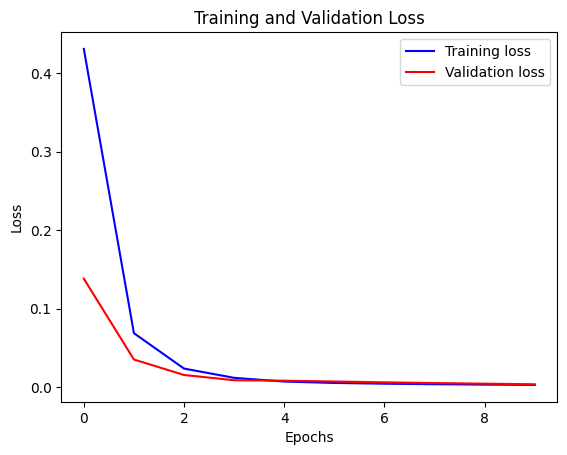

In [80]:
# Visualize the loss with the function below. After one point, the loss stops decreasing.

def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

#### Forecasting


2/2 [==============================] - 0s 5ms/step


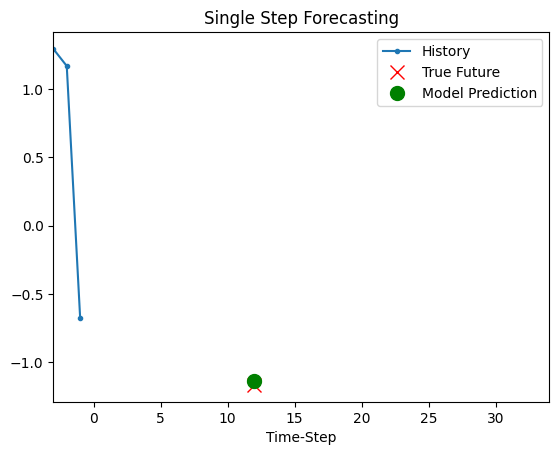

2/2 [==============================] - 0s 5ms/step


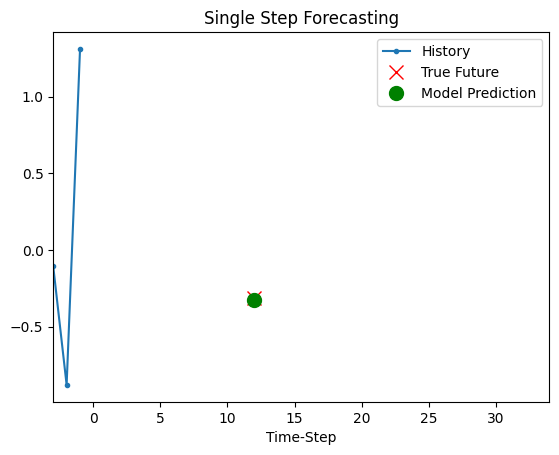

2/2 [==============================] - 0s 4ms/step


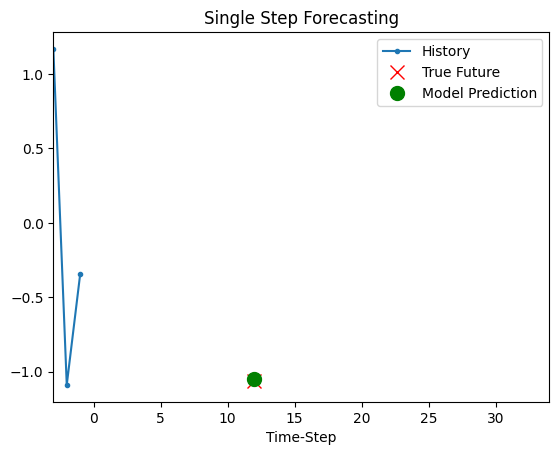

2/2 [==============================] - 0s 4ms/step


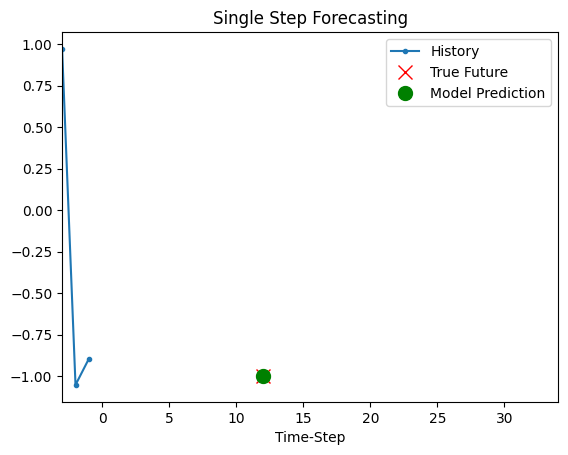

2/2 [==============================] - 0s 4ms/step


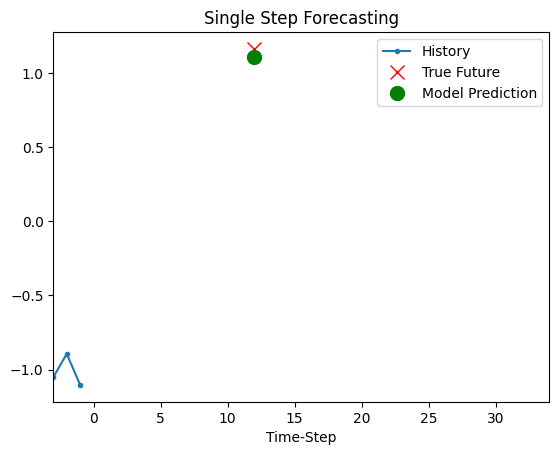

In [81]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Forecasting",
    )

In [ ]:
# Define model architecture
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))


# Compile model
model.compile(loss='mse', 
              optimizer='adam', 
              metrics=metrics
              )

model.summary()

In [ ]:
# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Epoch 1/50
223/223 - 4s - loss: 8.8459e-04 - MSE: 8.8459e-04 - RMSE: 0.0297 - MAE: 0.0116 - val_loss: 8.8720e-04 - val_MSE: 8.8720e-04 - val_RMSE: 0.0298 - val_MAE: 0.0106 - 4s/epoch - 17ms/step
Epoch 2/50
223/223 - 1s - loss: 4.4242e-04 - MSE: 4.4242e-04 - RMSE: 0.0210 - MAE: 0.0072 - val_loss: 6.2894e-04 - val_MSE: 6.2894e-04 - val_RMSE: 0.0251 - val_MAE: 0.0086 - 578ms/epoch - 3ms/step
Epoch 3/50
223/223 - 1s - loss: 3.0703e-04 - MSE: 3.0703e-04 - RMSE: 0.0175 - MAE: 0.0061 - val_loss: 4.7971e-04 - val_MSE: 4.7971e-04 - val_RMSE: 0.0219 - val_MAE: 0.0071 - 541ms/epoch - 2ms/step
Epoch 4/50
223/223 - 1s - loss: 2.2497e-04 - MSE: 2.2497e-04 - RMSE: 0.0150 - MAE: 0.0056 - val_loss: 3.6923e-04 - val_MSE: 3.6923e-04 - val_RMSE: 0.0192 - val_MAE: 0.0062 - 543ms/epoch - 2ms/step
Epoch 5/50
223/223 - 1s - loss: 1.7603e-04 - MSE: 1.7603e-04 - RMSE: 0.0133 - MAE: 0.0051 - val_loss: 3.2866e-04 - val_MSE: 3.2866e-04 - val_RMSE: 0.0181 - val_MAE: 0.0060 - 798ms/epoch - 4ms/step
Epoch 6/50
223/22

In [ ]:
# Evaluate the model's performance on the testing data
mse = model.evaluate(X_test, y_test, verbose=0)
# rmse = npy.sqrt(mse)
mse


[0.00012334251368883997,
 0.00012334251368883997,
 0.011105967685580254,
 0.004400851670652628]

In [ ]:
# make predictions on test set
y_pred = model.predict(X_test)
y_pred


In [ ]:
# reshape y_pred and y_test to 2D arrays
y_pred_2d = y_pred.reshape(-1, 1)
y_test_2d = y_test.values.reshape(-1, 1)


In [ ]:
# # invert scaling on predicted and actual values
# y_pred_scaled = scaler.inverse_transform(y_pred_2d)
# y_test_scaled = scaler.inverse_transform(y_test_2d)


In [ ]:

# # calculate root mean squared error (RMSE) on the unscaled values
# mse = mean_squared_error(y_test_scaled, y_pred_scaled)
# rmse = npy.sqrt(mse)

# # print RMSE
# print('Test RMSE:', rmse)
